The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
max value 252
mask.shape (720, 480)
mask_4.max 252


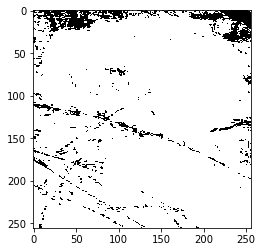

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
from PIL import Image
from os import listdir
import math as m

from util.generateMask3 import generateMasks

%load_ext autoreload
%autoreload 2

# SETTINGS
SAMPLE_IMAGE = 'data/test_images/18.jpg'

m4 = generateMasks(SAMPLE_IMAGE)
plt.imshow(m4*255)

In [2]:
## for testing different parameters and dimensions
img = cv2.imread('data/test_images/2.jpg', cv2.IMREAD_GRAYSCALE)
maxVal= np.max(img)
print("max value "+ str(np.max(img)))
threshold = 0.85 * maxVal
ret, mask = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO)
print("mask.shape " + str(mask.shape))

width, height = mask.shape
mask_bin = mask>200
count = 0
ind = [0 for i in range(width*height)]
for i in range(width):
    for j in range(height):
        if(mask_bin[i][j] == True):
            ind[count] = (j)*width + i
            count = count + 1
##end of for
sal = ind[0:count-1]
np.random.shuffle(sal)


max value 255
mask.shape (500, 334)


In [3]:
img

array([[117, 102, 110, ..., 136, 136, 136],
       [147, 126, 113, ..., 132, 132, 132],
       [238, 194, 137, ..., 130, 131, 131],
       ...,
       [231, 227, 224, ..., 151, 154, 157],
       [234, 230, 227, ..., 155, 158, 161],
       [ 85,  80,  77, ..., 157, 160, 164]], dtype=uint8)

In [18]:
mask_1 = mask_bin < 0
for i in range(int(m.floor((count-1)/3))):
    val = sal[i]
    row = m.floor(val/width)
    col = val - (row * width)
    mask_1[int(m.floor(col))][int(m.floor(row))] = 255
    mask_1 = mask_1.astype(np.uint8)


In [ ]:
 mask_2 = mask_bin <0
    for i in range(int(m.floor((count-1)/3+1)), int(m.floor(2*(count-1)/3))):
        val = sal[i]
        row = val/width
        col = val - (row * width)
        mask_2[int(m.floor(col))][int(m.floor(row))] = True
    mask_2 = mask_2.astype(np.uint8)
    #cv2.imwrite('data/mask/mask_2.jpg', mask_2)
    #plt.savefig('img_{}_mask2.jpg'.format(1))
    mask_3 = mask_bin <0
    for i in range(int(m.floor(2*(count-1)/3+1)), int(m.floor((count-1)/1))):
        val = sal[i]
        row = val/width
        col = val - (row * width)
        mask_3[int(m.floor(col))][int(m.floor(row))] = True
    mask_3 = mask_3.astype(np.uint8)
    #cv2.imwrite('data/mask/mask_3.jpg', mask_3)
    #plt.savefig('img_{}_mask3.png'.format(1))
    mask_4 = 1 - (mask_1 | mask_2 | mask_3)
    cv2.imwrite('data/mask_test_images/temp.jpg', mask_4)
    mask_4 = cv2.imread('data/mask_test_images/temp.jpg', cv2.IMREAD_COLOR)
    #cv2.imwrite('data/mask/mask_4_rgb.jpg', mask_4)
    print("mask_4.max "+ str(mask.max()))
    mask1 = cv2.resize(mask_4, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
  

max value 255
mask.shape (386, 384)
mask_4.max 255


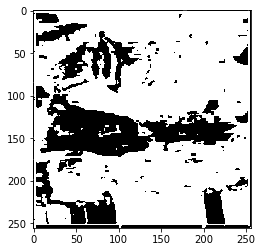

In [11]:
tempimg = 'data/testimgbad.jpg'
m4 = generateMasks(tempimg)
plt.imshow(m4*255)